In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import time
from sklearn.metrics import r2_score
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 5, activation = 'tanh'),
    tf.keras.layers.Dense(units = 5, activation = 'tanh'),
    tf.keras.layers.Dense(units = 5, activation = 'tanh'),
    
#     tf.keras.layers.Dense(units = 32, activation = 'tanh'),
#     tf.keras.layers.Dense(units = 32, activation = 'tanh'),
#     tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

In [16]:
optm = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [17]:
def ode_system(x, net):
    x = x.reshape(-1,1)
    x = tf.constant(x, dtype = tf.float32)
    x_0 = tf.zeros((1,1))
    x_1 = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as t2:
        t2.watch(x)
        with tf.GradientTape() as t1:
            t1.watch(x)
            u = net(x)
        
        u_x = t1.gradient(u, x)
    
    u_2x = t2.gradient(u_x, x)
    
    ode_loss = u_2x - (1/(1+x))*u_x 
    IC_loss = tf.square(net(x_0)) + tf.square(net(x_1)-x_1)

    square_loss = tf.square(ode_loss) + IC_loss
    total_loss = tf.reduce_mean(square_loss)
    
    del t1
    del t2 
    return total_loss

1.321247
0.3546918
0.30471015
0.27794647
0.24119876
0.1373253
0.017462945
0.010250632
0.0085354205
0.0075548138
0.006728377
0.005978403
0.005290709
0.004658591
0.0040771607
Training took 159.73 seconds.


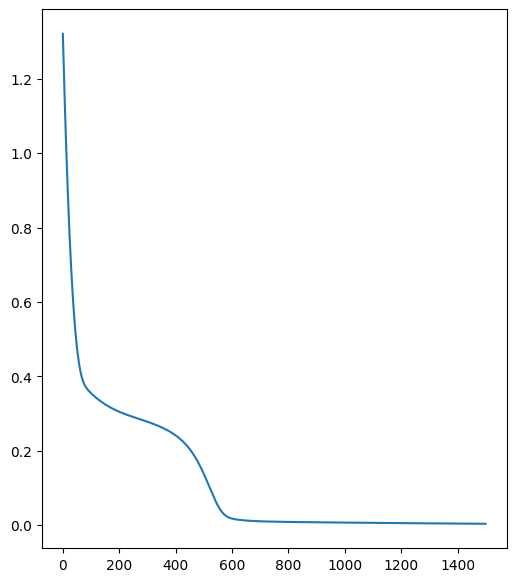

In [18]:
train_t = np.linspace(0,1,50)
train_loss_record = []

start_time = time.time()
for itr in range(1500):
    with tf.GradientTape() as tape:
        train_loss = ode_system(train_t, NN)
        train_loss_record.append(train_loss)
        
    grad_w = tape.gradient(train_loss, NN.trainable_variables)
    optm.apply_gradients(zip(grad_w, NN.trainable_variables))

    if itr % 100 == 0:
        print(train_loss.numpy())
end_time = time.time()
training_time = end_time - start_time

print(f"Training took {training_time:.2f} seconds.")
plt.figure(figsize = (6,7))
plt.plot(train_loss_record)
plt.show()

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/stepWARNING:tensorflow:5 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000023D58B14D30> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


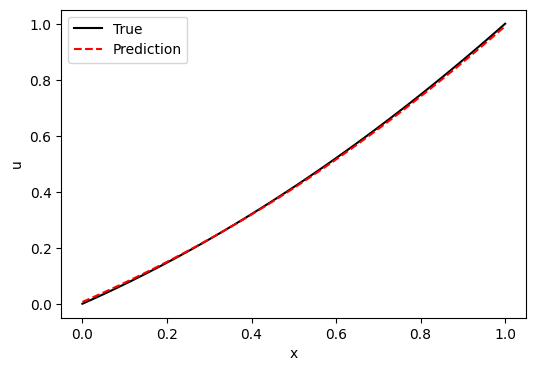

0.9996962929119453
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[0.99102694]]


In [19]:
test_t = np.linspace(0, 1, 100)

true_u = (1/3)*test_t*test_t +(2/3)*test_t
pred_u = NN.predict(test_t).ravel()

plt.figure(figsize = (6,4))
plt.plot(test_t, true_u, '-k',label = 'True')
plt.plot(test_t, pred_u, '--r', label = 'Prediction')
plt.legend(fontsize = 10)
plt.xlabel('x', fontsize = 10)
plt.ylabel('u', fontsize = 10)
plt.show()

r2 = r2_score(true_u, pred_u)
print(r2)

x_input = np.array([1])
pre = NN.predict(x_input)
print(pre)